In [5]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [6]:
#using git url for bringing housing prediction data into our environment
url = 'https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv'
housing_df = pd.read_csv(url,index_col=0,parse_dates=[0])
housing_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [7]:
#command to check what variables exist in our data set
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
#checking data types of variables in our dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [9]:
#Checking NA values in my dataset
housing_df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [10]:
housing_df['SalePrice'].isnull().sum()

1459

In [11]:
housing_df['MiscFeature'].isnull().sum()

2814

In [12]:
housing_df['MSZoning'].isnull().sum()

4

In [13]:
housing_df['PoolQC'].isnull().sum()

2909

In [14]:
housing_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [15]:
housing_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [16]:
housing_df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [17]:
housing_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Some of the columns justify that NAn values are because of the no entry in that record. For example- 
1. Misc Features shows only 5 values that are nan, 'Shed', 'Gar2', 'Othr', 'TenC'which means when a property did not have any extra features, the record either was left blank or as NAn. 

2. Pool QC has 2909 Nan values whereas total number of records in our dataset is 2919 which means only 10 records had values of Ex, Fa, Gd, rest all are Nan because there was no PoolQC in other properties. 

3. Alley had 'Grvl', 'Pave' for 198 records whereas rest were NAN. 

Similarly there are various columns in which we have many NAn values which are just showing noise in dataset. 

**SalePrice has 1459 Nan values in data which could be a problem as while considering SalePrice as the outcome variable (response variable) during linear regression, our model could become irrelevant or it might overfit. So we will have to remove those records wherein we have NAn values in saleprice. Rest all columns where we have Nan values are of not much importance as we can change those columns to binary variables. For ex- when we have a misc feature in a column, we can use 0 as there exists no misc feature and 1 as their exists a misc feature in that property.**

**We could have used impute method or convert NAn values of SalePrice to median values of the column which is used in some of the cases but here we have almost half of the records with Nan values which again will make our regression model irrelevant.**

~Overfitting means that we rely so much on our model prediction which could change when new data comes. 

In [18]:
#to check statistics of our dataset
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


This will help us in analyzing range (min-max) of different columns in our data. Also, we get the hint of skewness of different variables with the help of reading standard deviations and mean. 

**We can get hint of outliers that might exists in our dataset.**

We can see that the minimum sale price of any property was $34,900 whereas the maximum was $755,000

In [19]:
#sorting values in ascending order to check whether our minimum value of sale price is outlier or not
housing_df_sorted=housing_df.sort_values('SalePrice', ascending=True)
housing_df_sorted

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900.0
917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311.0
969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900.0
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300.0
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


*So, we do not have outliers in Sale Price because we have more records that are equivalent to the minimum prices.*

In [20]:
#removing rows that have NAn values in SalePrice
housing_df2 = housing_df[housing_df['SalePrice'].notna()]
housing_df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0


In [21]:
housing_df2['SalePrice'].isnull().sum()

0

In [22]:
#rounding the numeric variables in data set to 2 decimal places
housing_df3 = housing_df2.round(decimals = 2)

In [23]:
housing_df3['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [24]:
housing_df3.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [25]:
housing_df3['1stFlrSF']

Id
1        856
2       1262
3        920
4        961
5       1145
        ... 
1456     953
1457    2073
1458    1188
1459    1078
1460    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

In [26]:
#deviding the data into different features to check which variables are nominal and ordinal. 
#Nominal columns are those that can be labelled or classified into mutually exclusive categories within a variable 
nominal_var=['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'SaleType', 
    'SaleCondition','GarageType', 'Alley', 'Fence', 'MiscFeature']

#An ordinal variable is similar to a categorical variable. 
#The difference between the two is that there is a clear ordering of the categories
ordinal_var=['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
    'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 
    'Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC']

#Continuous data are numeric values that changes over time and can have different values at different time intervals. 
continuous_var=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'MiscVal']

#Discrete variables are those that have a fixed value and which cannot change such as year built can not change
discrete_var = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
    'MoSold', 'YrSold']

In [27]:
#converting missing values(NaN) in nominal and ordinal variables to None which will later be converted to dummies for building regression model
for col in (nominal_var + ordinal_var):
    housing_df3[col] = housing_df3[col].fillna('None')

In [28]:
housing_df3['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

We can see that we we have changed the NaN values to None for all nominal and ordinal columns. 

In [29]:
#Converting missing values (NaN) in all the numeric variables to 0 which would be significant in understanding correlations and building our model. 
for col in (continuous_var + discrete_var):
    housing_df3[col] = housing_df3[col].fillna(0)
    

In [30]:
housing_df3['Fireplaces'].unique()

array([0, 1, 2, 3])

We have changed NaN values in numerical variables to 0.

# Visualizations:

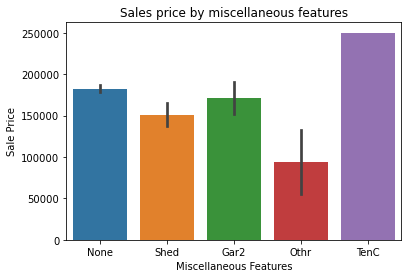

In [32]:
plot1 = sns.barplot(x='MiscFeature', y='SalePrice', data= housing_df3);
plt.xlabel('Miscellaneous Features');
plt.ylabel('Sale Price');
plt.title('Sales price by miscellaneous features');

We can see from the plot that TenC had the highest selling price. It also sheds light that some of the properties had sale prices higher than properties that even had some miscellaneous features (shed, Gar2, others) 

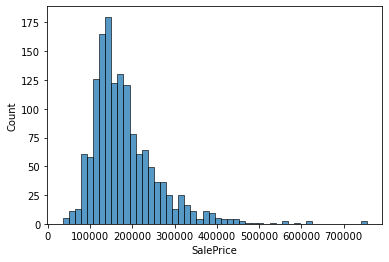

In [44]:
plot2=sns.histplot(x='SalePrice', data= housing_df3, bins=50)

Above histogram shows us the distribution of sale price in our data set which says our data is right skewed with the lowest sale price lesser than 50000  and  highest  more  than 750,000 dollars. 


Also, our mean selling price falls at 180,000 dollars approximately with standard deviation of 80000 dollars. 


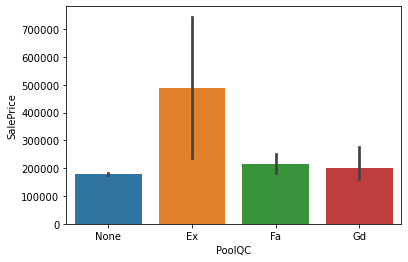

In [52]:
plot3= sns.barplot(x='PoolQC', y='SalePrice',data=housing_df3)

This shows that Ex type PoolQC had highest sale price whereas others had approximately similar

In [62]:
#grouping the data on basis of different neighborhoods to see the column features difference
housing_df4=housing_df3.groupby('Neighborhood').sum().reset_index()
housing_df4

,Neighborhood,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,Blmngtn,1940,660.0,57769,122,85,34089,34098,775.0,3332.0,...,2504,264,0,0,144,0,0,97,34127,3312805.0
1,Blueste,320,48.0,3250,12,12,3960,3960,0.0,366.0,...,311,0,0,0,0,0,0,12,4017,275000.0
2,BrDale,2560,345.0,28816,91,87,31543,31578,4921.0,4007.0,...,1092,128,0,0,0,0,0,93,32123,1671900.0
3,BrkSide,2885,2933.0,426904,293,356,112023,114178,429.0,11353.0,...,2079,1470,2311,144,1212,0,2070,360,116445,7240375.0
4,ClearCr,1470,1085.0,864521,165,159,55064,55545,2368.0,17385.0,...,5287,1815,911,130,978,0,900,190,56218,5951832.0
5,CollgCr,6495,9032.0,1442872,996,786,299683,299871,14584.0,68488.0,...,17148,7758,34,389,645,0,2450,921,301171,29694866.0
6,Crawfor,2970,2944.0,602294,320,336,99019,100939,4137.0,23807.0,...,2681,1377,2355,551,1539,0,2500,350,102382,10741861.0
7,Edwards,5680,6276.0,1021865,508,544,195597,197511,5047.0,42446.0,...,7077,3324,2638,180,1525,1218,1600,575,200794,12821970.0
8,Gilbert,4600,3914.0,898953,518,405,157862,157907,3280.0,16908.0,...,8123,3368,0,867,291,0,1680,521,158597,15235506.0
9,IDOTRR,1985,2125.0,300039,176,205,71334,72682,600.0,5302.0,...,739,1437,3069,0,310,0,4114,229,74287,3704580.0


In [65]:
#Filtering the data set to see differences in sale prices for neighborhoods. 
housing_df5= housing_df4.filter(['Neighborhood','SalePrice'], axis=1)


housing_df5

,Neighborhood,SalePrice
0,Blmngtn,3312805.0
1,Blueste,275000.0
2,BrDale,1671900.0
3,BrkSide,7240375.0
4,ClearCr,5951832.0
5,CollgCr,29694866.0
6,Crawfor,10741861.0
7,Edwards,12821970.0
8,Gilbert,15235506.0
9,IDOTRR,3704580.0


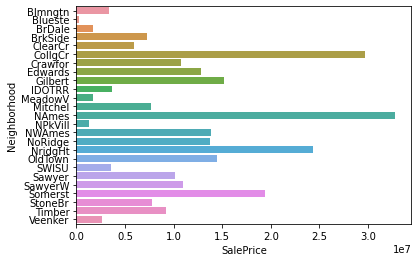

In [74]:
plot4= sns.barplot(x= 'SalePrice', y= 'Neighborhood', data=housing_df5)

We can see that NAmes (32815593.0) had the highest total sale price in our data whereas Blueste (275000.0) had the lowest.

TOP 5 most expensive neighborhoods are- 
1. NAmes
2. CollgCr
3. NridgHt
4. SomerSt
5. Gilbert

Lowest 5 least expensive neighborhoods are- 
1. Blueste
2. NPkVill
3. BrDale
4. MeadowV
5. Veenker



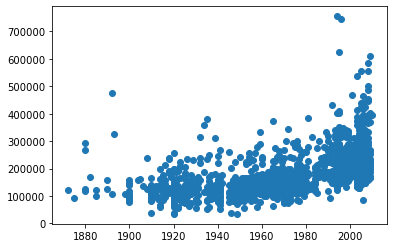

In [112]:
plt.scatter(housing_df3['YearBuilt'],housing_df3['SalePrice'])
plt.show()

We can see from the above scatterplot that we have an positive and increasing line wherein our sale price is poisitively impacted by the year built. This means the recent the house was built, more was its sale price which is true in general sense. 